# Analysis of Temoa Utopia results using pyam

The file `temoa_utopia_pyam.xlsx` used in this notebook is created by running the "Utopia" model

    $ python temoa_model/ --config=temoa_model/config_sample

Running **Temoa** exports the results (among other formats) in an Excel format compatible
with the IAMC timeseries template
used by the IPCC WG3, the Energy Modeling Forum, and numerous EU Horizon 2020 projects
([read more](https://pyam-iamc.readthedocs.io/en/stable/data.html)).

The **pyam** package provides a suite of tools for analysis and visualization
of energy systems scenarios based on that format - [read the docs](https://pyam-iamc.readthedocs.io)!

In [1]:
import pyam

<IPython.core.display.Javascript object>

In [2]:
df = pyam.IamDataFrame('temoa_utopia_test_run_model/test_run_pyam.xlsx')

pyam - INFO: Running in a notebook, setting up a basic logging config at level INFO
pyam.core - INFO: Reading file temoa_utopia_test_run_model/test_run_pyam.xlsx
pyam.core - INFO: Reading meta indicators


## Visualization of CO2 emissions by species and sectors

The first plot shows the aggregate CO2 and NOx emissions over the model horizon.

<AxesSubplot:title={'center':'model: Temoa - scenario: test_run - region: utopia'}, xlabel='Year', ylabel='?'>

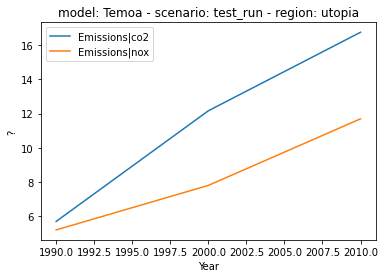

In [3]:
df.filter(variable='Emissions|*', level=0).plot()

The next plot shows the CO2 emissions by sector.

<AxesSubplot:title={'center':'model: Temoa scenario: test_run region: utopia'}, xlabel='Year', ylabel='?'>

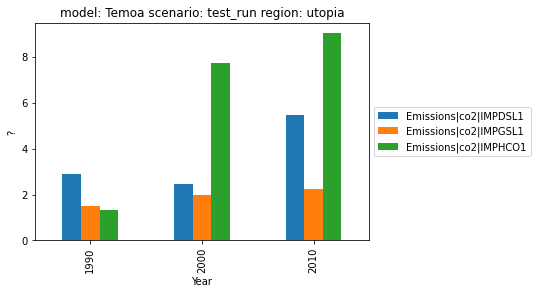

In [4]:
df.filter(variable='Emissions|co2|*').plot.bar()

Or if you prefer stacked bar charts...

<AxesSubplot:title={'center':'model: Temoa scenario: test_run region: utopia'}, xlabel='Year', ylabel='?'>

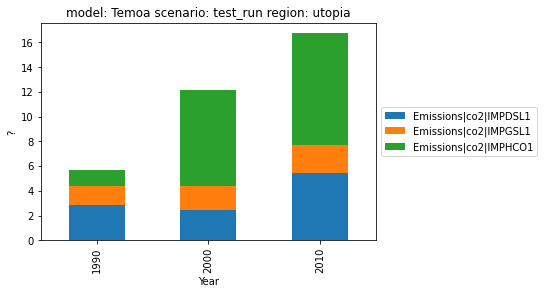

In [5]:
df.filter(variable='Emissions|co2|*').plot.bar(stacked=True)

## Further analysis of emissions

So you want to "look" at the actual values of some timeseries?

Here, we first select aggregate CO2 and the emissions by each technology starting with 'IMP'
(because the other technologies are zero anyway, as we have seen from the plots above).

In [6]:
co2 = df.filter(variable=['Emissions|co2', 'Emissions|co2|IMP*']).timeseries()
co2

1990       2000  \
model scenario region variable              unit                        
Temoa test_run utopia Emissions|co2         ?     5.696337  12.158800   
                      Emissions|co2|IMPDSL1 ?     2.894805   2.454922   
                      Emissions|co2|IMPGSL1 ?     1.493507   1.961039   
                      Emissions|co2|IMPHCO1 ?     1.308025   7.742839   

                                                       2010  
model scenario region variable              unit             
Temoa test_run utopia Emissions|co2         ?     16.747008  
                      Emissions|co2|IMPDSL1 ?      5.453948  
                      Emissions|co2|IMPGSL1 ?      2.250000  
                      Emissions|co2|IMPHCO1 ?      9.043060

The next cell uses the [pyam.cumulative](https://pyam-iamc.readthedocs.io/en/stable/api/timeseries.html#pyam.cumulative) function
to compute the emissions on the timeseries data selected above.

In [7]:
co2.apply(pyam.cumulative, first_year=1990, last_year=2010, axis=1)

model  scenario  region  variable               unit
Temoa  test_run  utopia  Emissions|co2          ?       245.026399
                         Emissions|co2|IMPDSL1  ?        70.467368
                         Emissions|co2|IMPGSL1  ?        40.199675
                         Emissions|co2|IMPHCO1  ?       134.359356
dtype: float64

And just to prove the usefulness of this function:
it also works if you select a `first_year` argument that is not a native model year!

In [8]:
co2.apply(pyam.cumulative, first_year=1995, last_year=2010, axis=1)

model  scenario  region  variable               unit
Temoa  test_run  utopia  Emissions|co2          ?       210.082252
                         Emissions|co2|IMPDSL1  ?        56.433225
                         Emissions|co2|IMPGSL1  ?        32.264610
                         Emissions|co2|IMPHCO1  ?       121.384416
dtype: float64

## Exporting to different file formats

You can use pyam to export your data in different file formats,
for example as a [frictionless data package](https://frictionlessdata.io)!

In [9]:
df.to_datapackage('utopia.zip')

<div class="alert alert-info">

## Questions?

Take a look at [this tutorial](https://pyam-iamc.readthedocs.io/en/stable/tutorials/pyam_first_steps.html) for *first steps with pyam* - then join our [mailing list](https://groups.io/g/pyam)!

</div>